# Statistical Tests Tutorial

### imports

In [4]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

### F-Test for Equality of Variances (Two-Tailed)

**Null Hypothesis**: $H_0: \sigma_1^2 = \sigma_2^2$  
**Alternative Hypothesis**: $H_1: \sigma_1^2 \ne \sigma_2^2$

**Test Statistic**:  
$$
F = \frac{s_1^2}{s_2^2}
$$
where $s_1^2$ and $s_2^2$ are the sample variances.

**Degrees of Freedom**:
- $df_1 = n_1 - 1$  
- $df_2 = n_2 - 1$

A **two-tailed** F-test compares the statistic to both the upper and lower critical values of the F-distribution.

If the test statistic falls in the rejection region (either tail), we **reject $H_0$** and conclude that the variances are significantly different.


### F-test Example: Comparing Variances of Two Samples

In [32]:
# Generate two samples with different variances
np.random.seed(42)
sample1 = np.random.normal(loc=0, scale=5, size=50)
sample2 = np.random.normal(loc=1, scale=6.5, size=50)

In [33]:
# Sample variances (unbiased)
var1 = np.var(sample1, ddof=1)
var2 = np.var(sample2, ddof=1)

f_statistic = var1 / var2
dfn, dfd = len(sample1) - 1, len(sample2) - 1

# Note we could choose this order instead:
# f_statistic = var2 / var1
# dfn, dfd = len(sample2) - 1, len(sample1) - 1

# Two-tailed test
alpha = 0.05
f_critical_low = stats.f.ppf(alpha / 2, dfn, dfd)
f_critical_high = stats.f.ppf(1 - alpha / 2, dfn, dfd)

p_value = 2 * min(
    stats.f.cdf(f_statistic, dfn, dfd),
    1 - stats.f.cdf(f_statistic, dfn, dfd)
)

print(f"Sample 1 variance: {var1:.4f}")
print(f"Sample 2 variance: {var2:.4f}")
print(f"F-statistic: {f_statistic:.4f}")
print(f"Critical values: F < {f_critical_low:.4f} or F > {f_critical_high:.4f}")
print(f"P-value: {p_value:.4f}")

if f_statistic < f_critical_low or f_statistic > f_critical_high:
    print("Reject the null hypothesis: The variances are significantly different.")
else:
    print("Fail to reject the null hypothesis: No evidence that the variances differ.")


Sample 1 variance: 21.7934
Sample 2 variance: 32.2978
F-statistic: 0.6748
Critical values: F < 0.5675 or F > 1.7622
P-value: 0.1721
Fail to reject the null hypothesis: No evidence that the variances differ.


### Visualize Rejection Regions

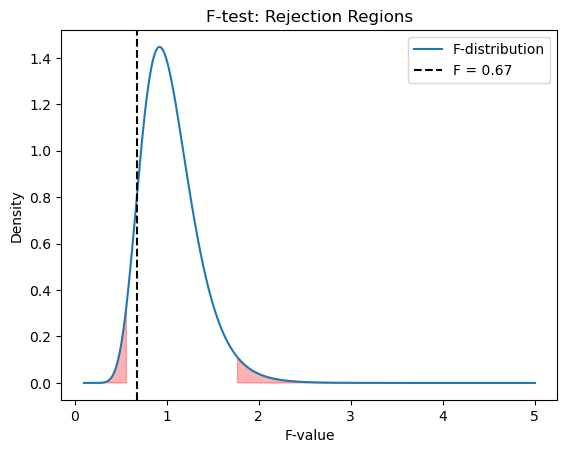

In [34]:
x = np.linspace(0.1, 5, 500)
y = stats.f.pdf(x, dfn, dfd)

plt.plot(x, y, label="F-distribution")
plt.fill_between(x, 0, y, where=(x < f_critical_low) | (x > f_critical_high), color='red', alpha=0.3)
plt.axvline(f_statistic, color='black', linestyle='--', label=f'F = {f_statistic:.2f}')
plt.title('F-test: Rejection Regions')
plt.xlabel('F-value')
plt.ylabel('Density')
plt.legend()
plt.show()

In [35]:
stats.f.cdf(1, dfn, dfd)

0.5